In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline

MAPE: Mean Absolute Percentaje Error


In [3]:
def mape_score(y_test,y_pred):
    n = len(y_test)
    error = np.abs((y_test - y_pred)/np.mean(y_test))
    return np.sum(error)/n
    
def show_errors(y_test,y_pred):
    if type(y_test) is pd.DataFrame:
        y_test = y_test.values
    if type(y_pred) is pd.DataFrame:
        y_pred = y_pred.values
        
    n_metrics = 5
    metrics = np.zeros((n_metrics,13))
    for i in range(12):
        mae = sm.mean_absolute_error(y_test[:,i],y_pred[:,i])
        mse = sm.mean_squared_error(y_test[:,i],y_pred[:,i])
        medae = sm.median_absolute_error(y_test[:,i],y_pred[:,i])
        r2 = sm.r2_score(y_test[:,i],y_pred[:,i])
        mape = mape_score(y_test[:,i],y_pred[:,i])
        metrics[0,i] = mae
        metrics[1,i] = mse
        metrics[2,i] = medae
        metrics[3,i] = mape
        metrics[4,i] = r2
    for i in range(n_metrics):
        metrics[i,12] = np.mean(metrics[i,:12])
    
    metrics = pd.DataFrame(metrics)
    column_names = []
    for i in range(12):
        column_names.append("$t+{}$".format(i))
    column_names.append("$\overline{t+i}$")
    metrics.index = ["MAE","MSE", "MeAE", "MAPE" ,"$r^2$"]
    metrics.columns = column_names
    return metrics

In [4]:
column_names = []
for i in range(1,13):
    if i < 10:
        column_names.append("$t+.{}$".format(i))
    else:
        column_names.append("$t+{}$".format(i))

# ARIMA

In [5]:
y_pred = pd.read_csv("../../results/arima/12_1_12/y_approx.csv",names=column_names, skiprows=1)
y_test  = pd.read_csv("../../results/arima/12_1_12/y_test.csv",names=column_names, skiprows=1)
error = y_test - y_pred

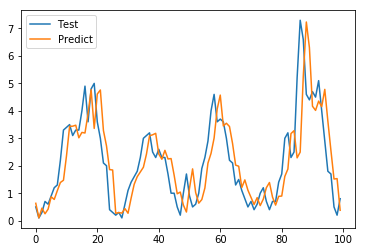

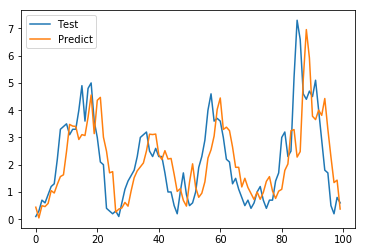

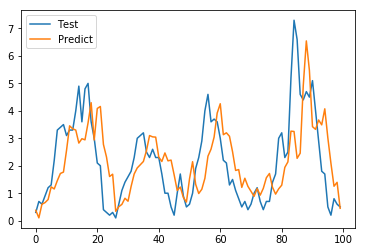

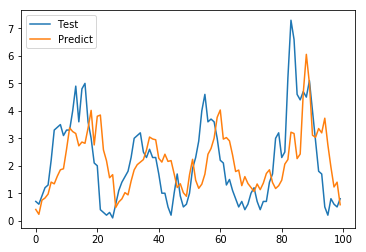

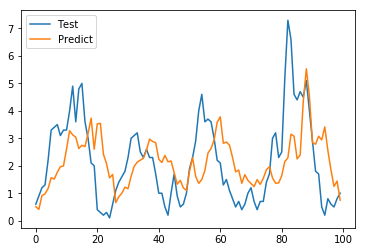

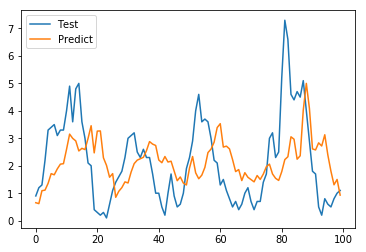

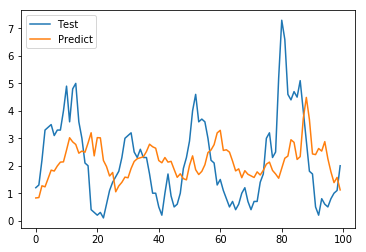

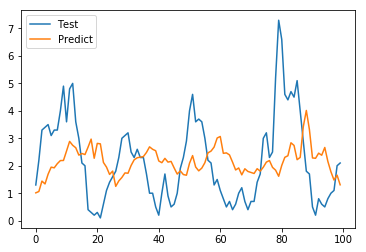

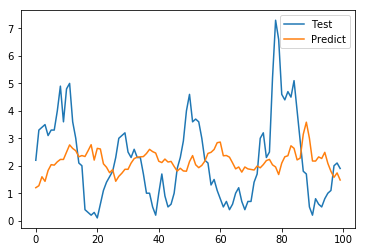

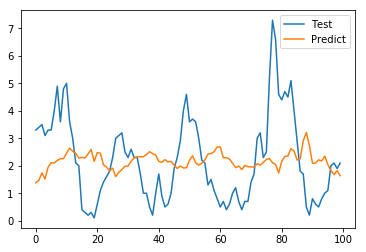

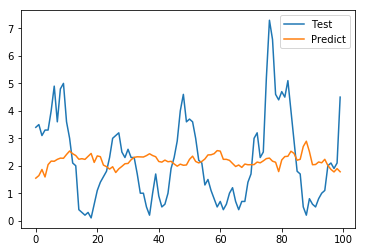

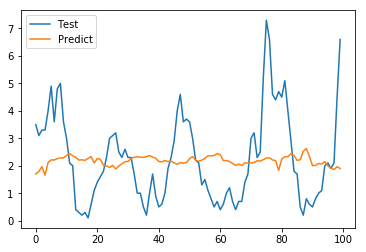

In [6]:
for key in y_test.keys():
    plt.plot(y_test[key][:100], label="Test")
    plt.plot(y_pred[key][:100],label="Predict")
    plt.legend()
    plt.show()

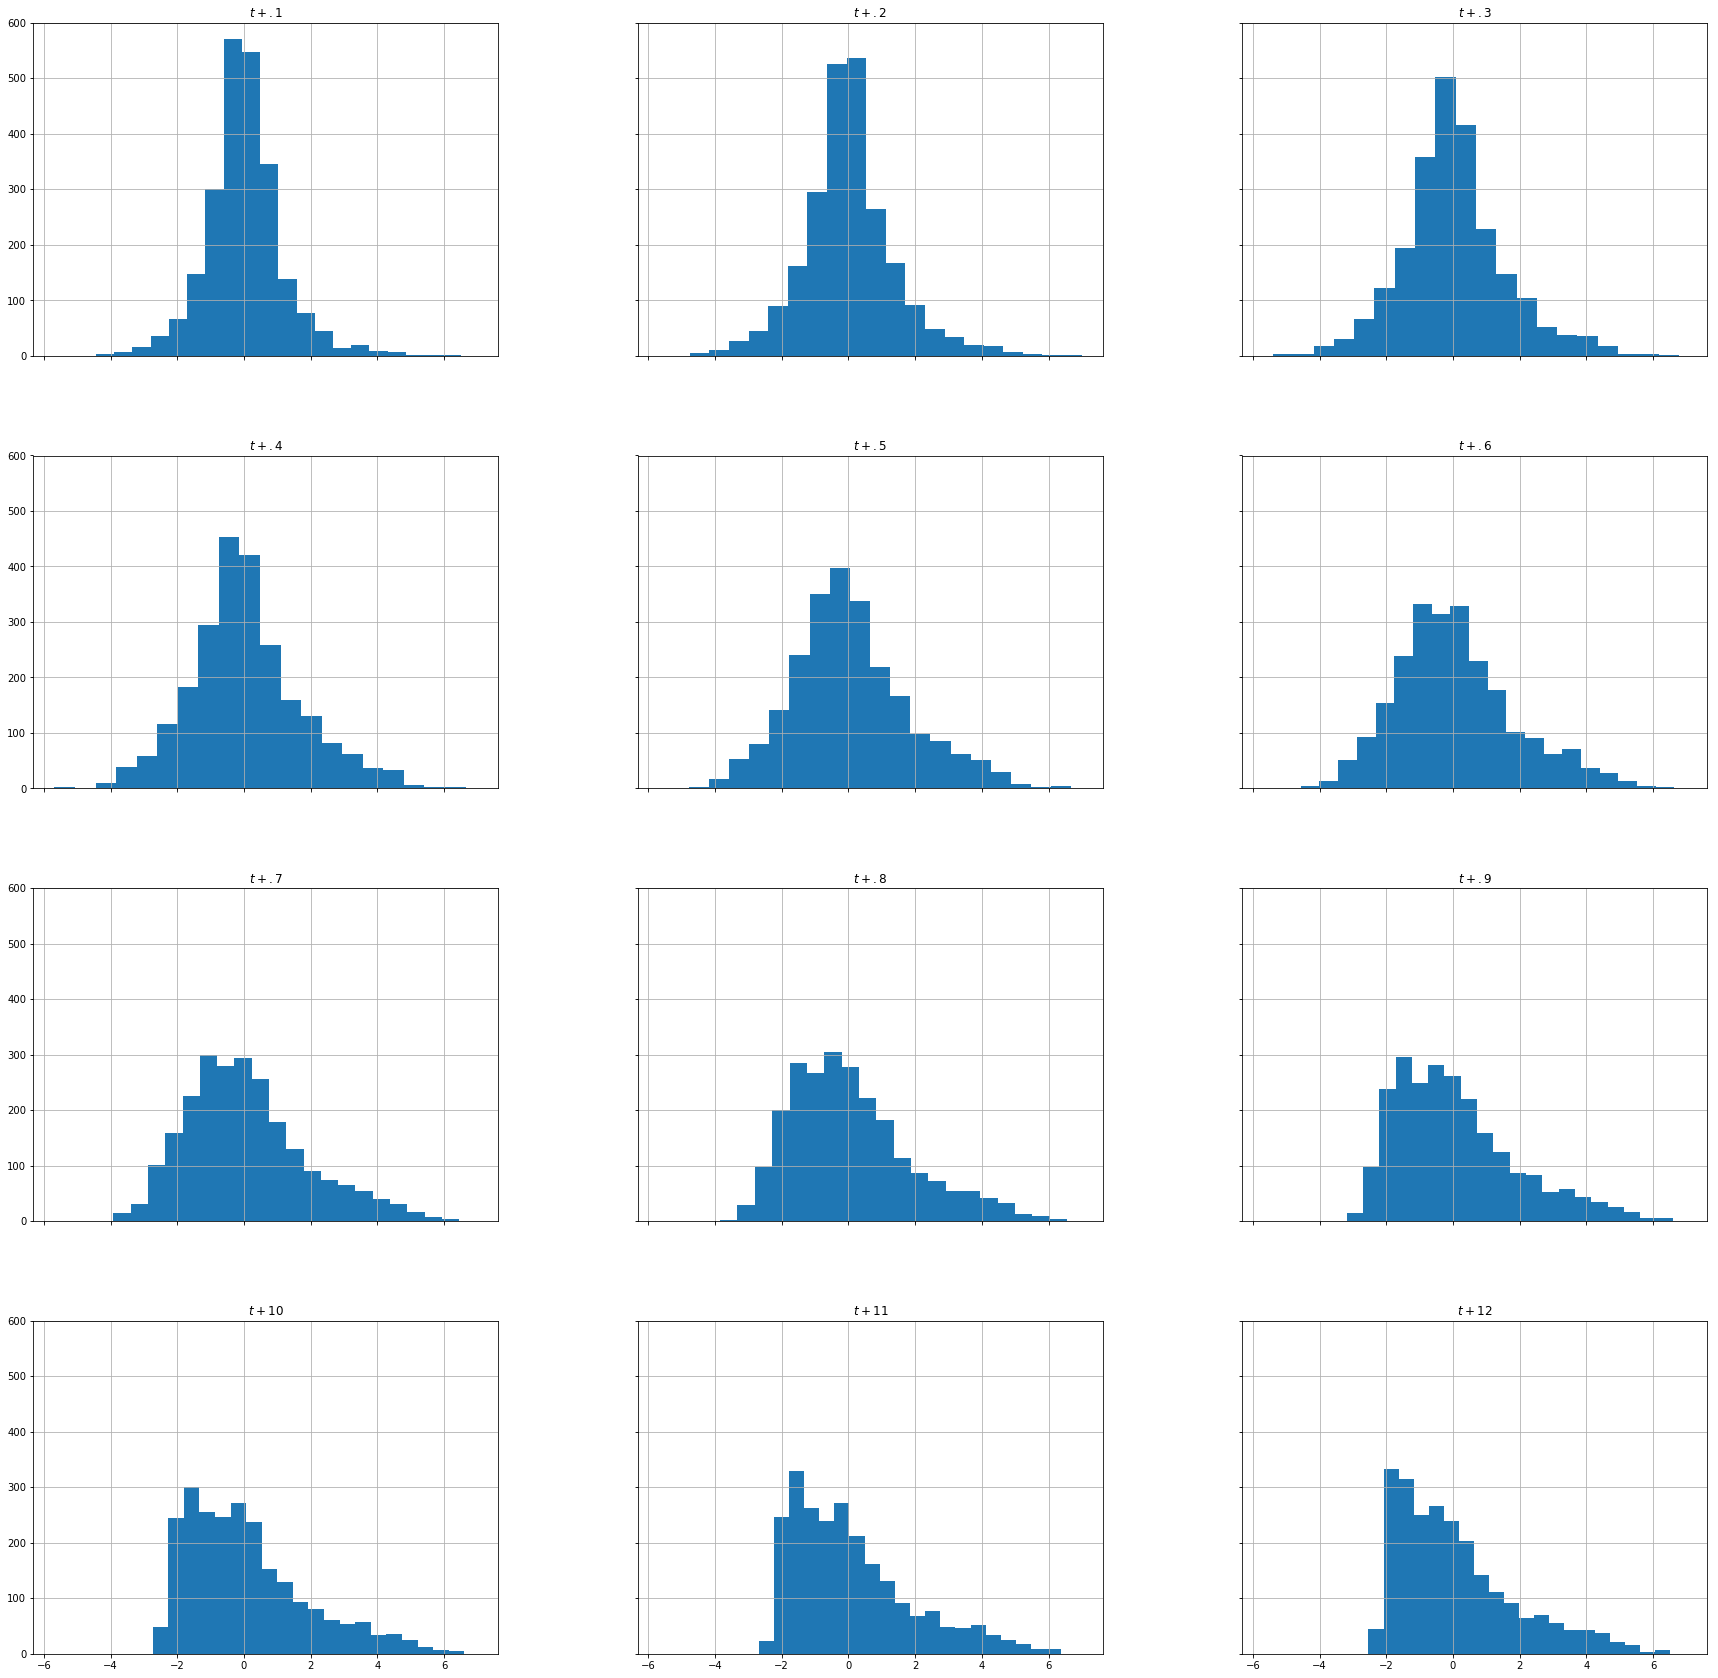

In [7]:
error.columns = pd.CategoricalIndex(column_names, order=True)
error.hist(sharex=True,sharey=True,bins=20, figsize=(30,30))
plt.show()

In [8]:
metrics = show_errors(y_test,y_pred)
metrics

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.809174,0.990590,1.143910,1.256119,1.340277,1.388079,1.412545,1.421871,1.423501,1.416244,1.405684,1.394503,1.283542
MSE,1.280852,1.903371,2.418813,2.783193,3.052338,3.200994,3.295783,3.322586,3.311063,3.279970,3.228098,3.181551,2.854884
MeAE,0.576844,0.692282,0.818954,0.933947,1.035462,1.116815,1.162275,1.187928,1.231912,1.240960,1.237079,1.221319,1.037981
MAPE,0.352977,0.432098,0.498949,0.547791,0.584394,0.605271,0.615985,0.620144,0.620947,0.617942,0.613585,0.608886,0.559914
$r^2$,0.586443,0.385389,0.218818,0.100769,0.013530,-0.034355,-0.064799,-0.073106,-0.069057,-0.058695,-0.041895,-0.027011,0.078003


# LSTM

In [9]:
y_pred = pd.read_csv("../../results/lstm/y_approx.csv",names=column_names)
y_test  = pd.read_csv("../../results/lstm/y_test.csv",names=column_names)
error = y_test - y_pred

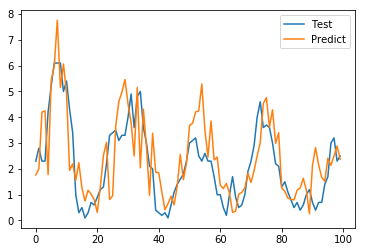

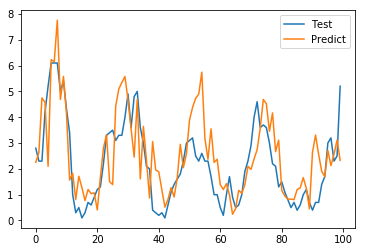

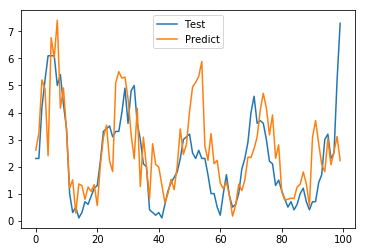

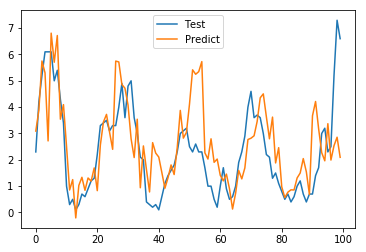

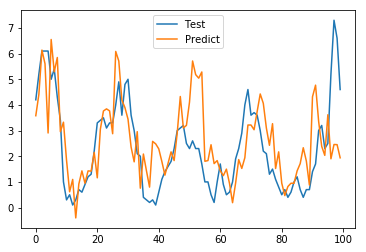

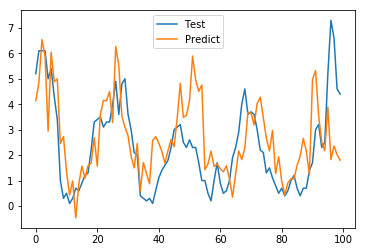

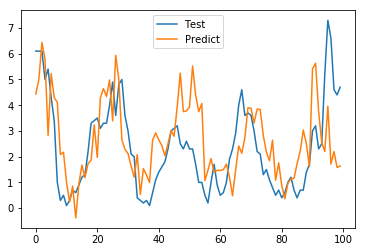

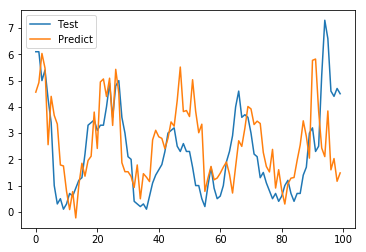

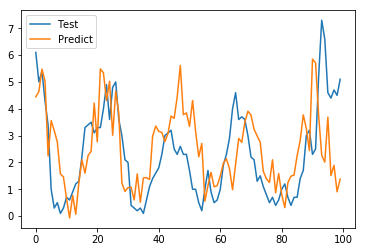

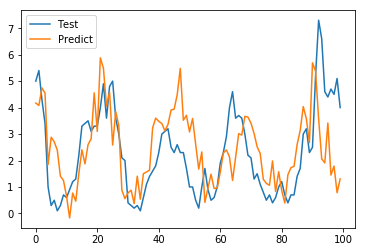

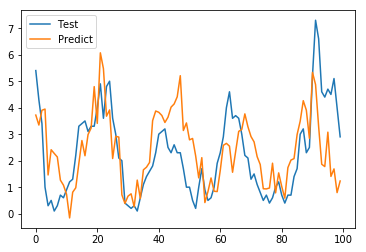

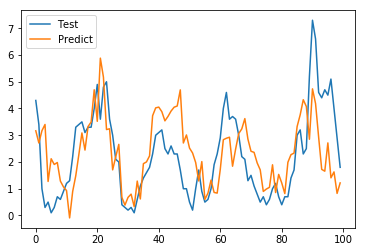

In [10]:
for key in y_test.keys():
    plt.plot(y_test[key][:100], label="Test")
    plt.plot(y_pred[key][:100],label="Predict")
    plt.legend()
    plt.show()

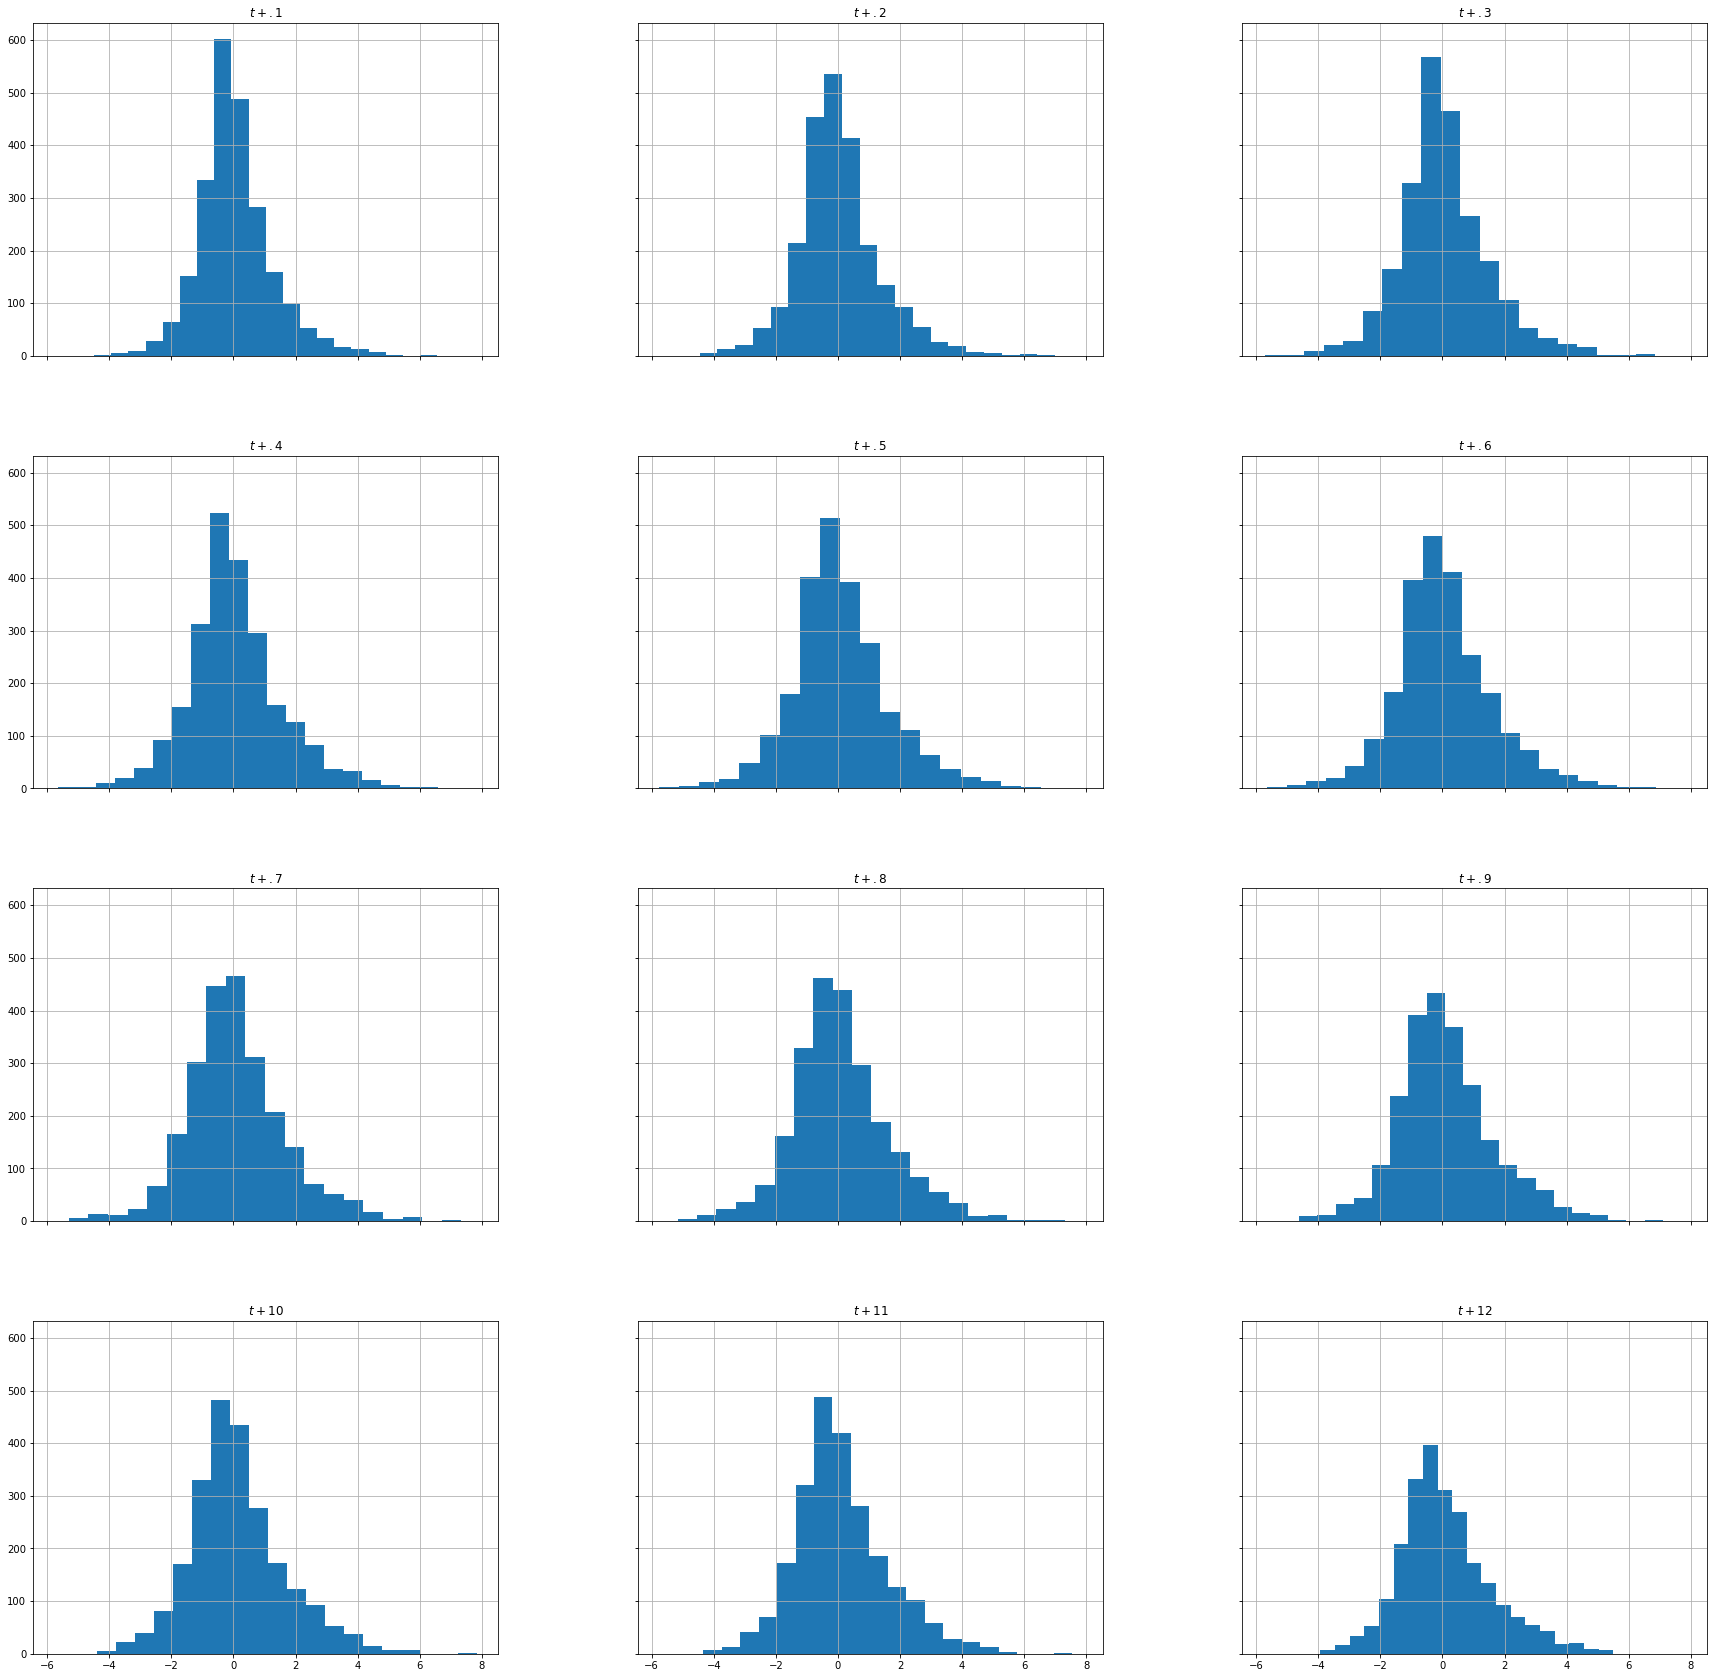

In [11]:
error.columns = pd.CategoricalIndex(column_names, order=True)
error.hist(sharex=True,sharey=True,bins=20, figsize=(30,30))
plt.show()

In [12]:
metrics = show_errors(y_test,y_pred)
metrics

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.870042,0.966902,1.049876,1.113848,1.150948,1.156451,1.165219,1.169782,1.164745,1.149451,1.131481,1.118835,1.100632
MSE,1.407126,1.753112,2.035721,2.247757,2.388078,2.406629,2.442141,2.441262,2.402942,2.346623,2.247815,2.165493,2.190392
MeAE,0.630859,0.690456,0.755856,0.806907,0.853947,0.871730,0.890678,0.878282,0.880312,0.867258,0.874352,0.837604,0.819853
MAPE,0.379190,0.421420,0.457567,0.485376,0.501320,0.503726,0.507592,0.509901,0.507903,0.501271,0.493389,0.488109,0.479730
$r^2$,0.547718,0.436514,0.345699,0.277612,0.233122,0.227125,0.215436,0.214183,0.225291,0.243149,0.275311,0.300951,0.295176
